<a href="https://colab.research.google.com/github/aswx12/MatteLab/blob/Hoang/Mattelab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [39]:
github_url = 'https://github.com/aswx12/MatteLab/raw/refs/heads/main/Data_source.xlsx'

try:
    df = pd.read_excel(github_url)
    print("Loaded")
    display(df.head())
except Exception as e:
    print(f"Error: {e}")

Loaded


,Id,ethnicgp,gender,age,years,commit,satis,autonom,routine,attend,skill,prody,qual,absence,income
0,1,1,1,29.0,1.0,4.0,NaN,10,9,2,3,NaN,1,7.0,16.6
1,2,2,1,26.0,5.0,2.0,NaN,7,15,1,3,4.0,4,8.0,14.6
2,3,3,1,40.0,5.0,4.0,15.0,7,8,1,4,3.0,4,0.0,17.8
3,4,3,1,46.0,15.0,2.0,7.0,7,10,2,3,3.0,4,4.0,16.4
4,5,2,2,63.0,36.0,4.0,14.0,11,18,1,3,5.0,3,0.0,18.6


EXERCISE 1.1

a)

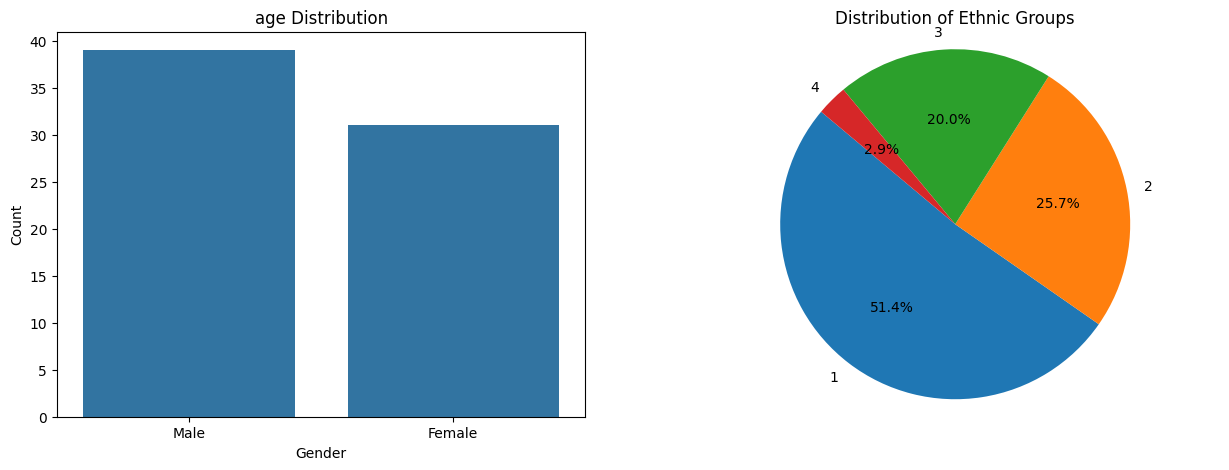

In [13]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Create a bar chart for gender
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0])
axes[0].set_title('age Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)


# Count the occurrences of each ethnic group
ethnic_counts = df['ethnicgp'].value_counts()
axes[1].pie(ethnic_counts, labels=ethnic_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Distribution of Ethnic Groups')
axes[1].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

c)

,income
mean,15.638235
std,1.995894


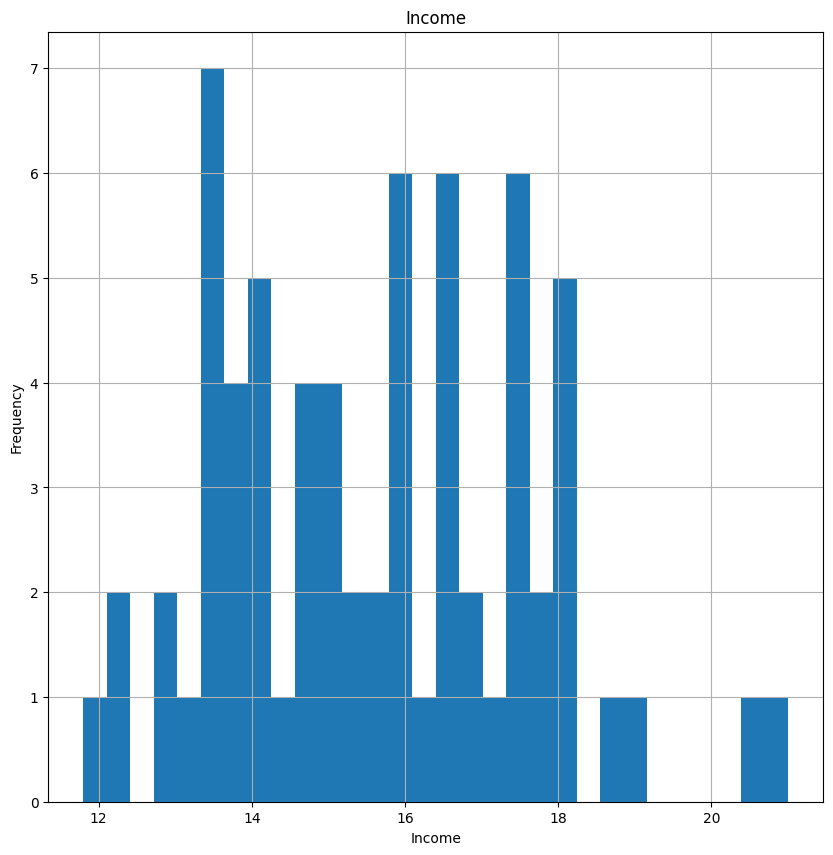

In [25]:
display(df['income'].agg(['mean','std']))

df['income'].hist(figsize=(10, 10),bins=30)
plt.title("Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

Excersise 2

a)


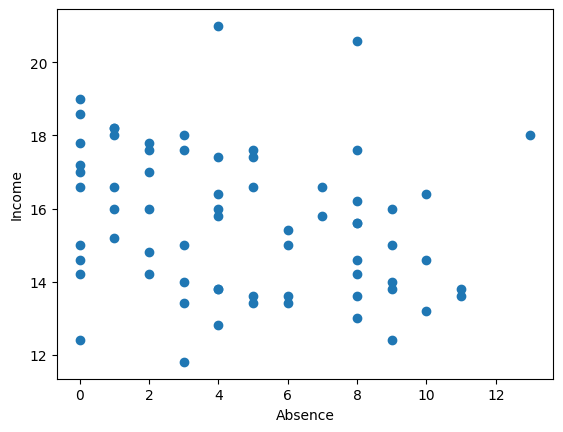

b) 

Intercept b0:  16.325322949730566
Slope b1: -0.14312024802539314
R2:  0.06243389452270087
Model:  16.325322949730566 + -0.14312024802539314 *absence


In [64]:
print("a)")
plt.scatter(df['absence'],df['income'])
plt.xlabel("Absence")
plt.ylabel("Income")
plt.show()


print("b) \n")
df_noNaN = df.dropna(subset=['income','absence'])
x=df_noNaN[['absence']]
y=df_noNaN['income']

reg = LinearRegression().fit(x, y)

b0=reg.intercept_
b1= reg.coef_[0]
r2 = reg.score(x, y)
print("Intercept b0: ",b0)
print("Slope b1:", b1)
print("R2: ", r2)
print("Model: ",b0,"+",b1,"*absence")



Exercise 1.3

In [75]:
df_noNaN = df.dropna(subset=['satis','commit','autonom', 'income', 'skill', 'qual', 'age', 'years'])

x=df_noNaN[['commit', 'autonom', 'income', 'skill', 'qual', 'age', 'years']]
#x=df_noNaN[['commit', 'autonom', 'income', 'skill', 'qual']] #- Check if age and years are the insignificant values
y=df_noNaN['satis']

x =sm.add_constant(x)
reg = sm.OLS(y, x).fit()

display(reg.pvalues)
display(reg.tvalues)


,0
const,0.013147
commit,0.000051
autonom,0.000053
income,0.010946
skill,0.003559
qual,0.155518
age,0.735361
years,0.660962


,0
const,-2.564465
commit,4.401549
autonom,4.391415
income,2.635395
skill,3.048340
qual,1.440432
age,0.339752
years,-0.441017
